<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Práctica 5. Introducción al análisis frecuencial de señales </center></font></h1>
<font  face="Times New Roman" size="3">
<p1><center> Angie Triana - Erika Gómez - Ana Carolina Mejía</center></p1>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from scipy.signal import welch
import sympy
from sympy import ifft
import pandas as pd
import zipfile
import os

# **1. Ejemplo de representación de señales**

Como ejemplo de señal discreta se utiliza una señal analógica *x(t)=Asin(2π Fo t)* con frecuencia fundamental de 40Hz, amplitud de 5V y frecuencia de muestreo de 1000Hz (T=0.001s). Definiendo estos parámetros en Python y se toma un ciclo de la señal muestreada:

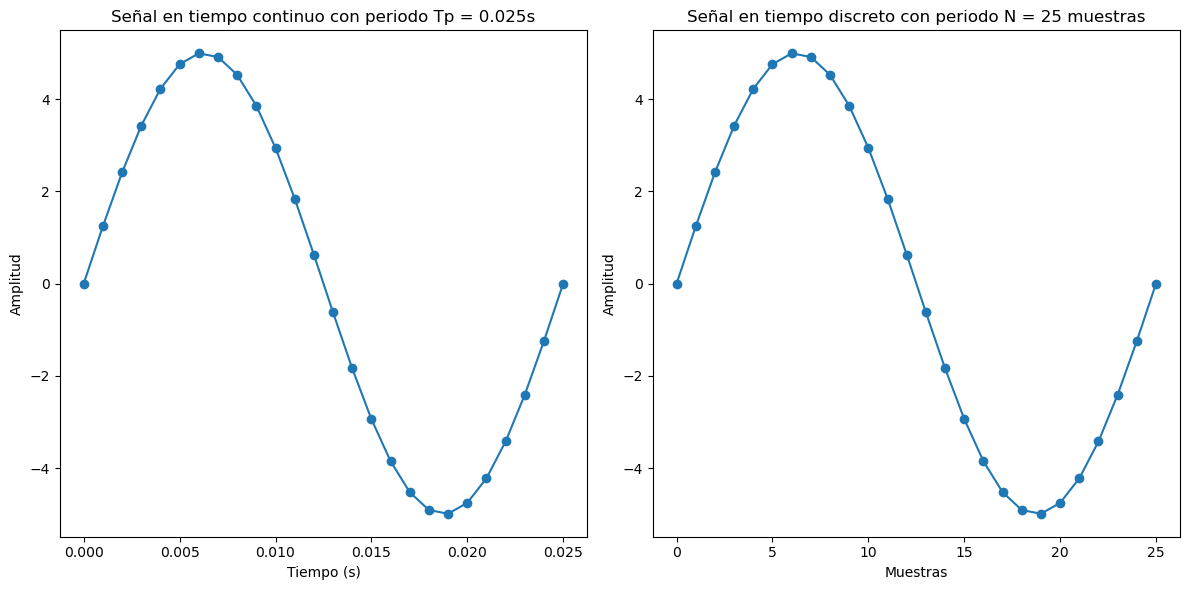

In [6]:
Fo = 40  # Frecuencia fundamental de la señal
Tp = 1 / Fo  # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 1 / Fs  # Periodo de muestreo
A = 5  # Amplitud de la señal

# Primer gráfico: Señal continua
t = np.arange(0, Tp+T, T)  # Tiempo para un ciclo de la señal con duración de Tp
x = A * np.sin(2 * np.pi * Fo * t)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title("Señal en tiempo continuo con periodo Tp = 0.025s")

# Segundo gráfico: Señal en tiempo discreto

fo=Fo/Fs
n = np.arange(0, len(t))
x1 = A * np.sin(2 * np.pi * fo * n )
plt.subplot(1, 2, 2)
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title("Señal en tiempo discreto con periodo N = 25 muestras")

plt.tight_layout()
plt.show()

## a) Compruebe que los valores de las primeras cinco muestras son los mismos

Para comprobar que los valores de las primero cinco muestras son los mismos en ambas opciones utilizadas para la visualización de la señal discreta en Python, se imprimen y comparan:

In [9]:
muestras_x = x[:5]
muestras_x1 = x1[:5]

In [11]:
print(f'''
Valores de las primeras cinco muestras para x(n)

Muestra 1 = {muestras_x[0]}
Muestra 2 = {muestras_x[1]}
Muestra 3 = {muestras_x[2]}
Muestra 4 = {muestras_x[3]}
Muestra 5 = {muestras_x[4]}

Valores de las primeras cinco muestras para x1(n)

Muestra 1 = {muestras_x1[0]}
Muestra 2 = {muestras_x1[1]}
Muestra 3 = {muestras_x1[2]}
Muestra 4 = {muestras_x1[3]}
Muestra 5 = {muestras_x1[4]}''')


Valores de las primeras cinco muestras para x(n)

Muestra 1 = 0.0
Muestra 2 = 1.243449435824274
Muestra 3 = 2.4087683705085765
Muestra 4 = 3.4227355296434436
Muestra 5 = 4.221639627510076

Valores de las primeras cinco muestras para x1(n)

Muestra 1 = 0.0
Muestra 2 = 1.243449435824274
Muestra 3 = 2.4087683705085765
Muestra 4 = 3.4227355296434436
Muestra 5 = 4.221639627510076


Igualmente, es posible comprobar si son equivalentes utilizando un condicional.

In [14]:
if np.all(x[:5] == x1[:5]):
    print("Las primeras 5 muestras de las señales discretas son equivalentes.")
else:
    print("Las primeras 5 muestras de las señales discretas no son equivalentes.")

Las primeras 5 muestras de las señales discretas son equivalentes.


# **1.1. Energía y potencia en el dominio del tiempo**

In [17]:
energia = sum(x**2) #Suma las magnitudes de la señal discreta al cuadrado.
potencia = energia / (len(t)-1)
rms = np.sqrt(potencia)

Para hallar la energía y la potencia media de la señal considerando 10 ciclos de la sinusoide
(t = 250 ms).

In [20]:
t10 = np.arange(0,10*Tp+T,T) #Ahora se multiplica el periodo de la señal * 10 (# de ciclos). Ira hasta 0.25 s = 250ms, en pasos de 1ms
#Se tendran entonces 250 muestras.
x10 = A*np.sin(2*np.pi*Fo*t10)
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)
print(f'''
Energia x(n) = {energia10}
Potencia x(n) = {potencia10}
RMS x(n) = {rms10}''')


Energia x(n) = 3125.0000000000014
Potencia x(n) = 12.500000000000005
RMS x(n) = 3.535533905932738


In [22]:
energia_x= sum(x**2)
potencia_x = energia_x/(len(t)-1)
rms_x = np.sqrt(potencia_x)
print(f'''
Energia x(n) = {energia_x}
Potencia x(n) = {potencia_x}
RMS x(n) = {rms_x}''')


Energia x(n) = 312.50000000000006
Potencia x(n) = 12.500000000000002
RMS x(n) = 3.5355339059327378


Se observa que la potencia es la misma que en x(n).

# La potencia es la misma que en x(n). ¿Por qué?

La energía es la suma de las magnitudes al cuadrado de todas las muestras de la señal x(n). Al calcular la energía para 10 ciclos, esta incrementa de manera proporcional con el número de ciclos, puesto que se incrementa el número de muestras, y la energía de 10 ciclos será aproximadamente 10 veces la energía de un solo ciclo. La potencia, por su parte, es una métrica de la señal que se obtiene al promediar la energía en el número de muestras. Al aumentar la energía y el número de muestras, la potencia media o intensidad promedio de la señal se mantendrá constante, por lo que se conserva aunque se incremente el número de ciclos.

# **2. Procedimiento**

**2.1** *Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente.*

Para la representación de la señal, la frecuencia de muestreo mínima necesaria para representar sería 320 Hz (correspondiente al doble de la Fmax = 160 Hz). No obstante, al visualizarla se consideró que no representaba de manera apropiada la señal, por lo que se utilizó una frecuencia de muestreo de 3000 Hz con el fin de preservar su dinámica senoidal. Esto asegura el cumplimiento del teorema de muestreo de Nyquist-Shannon, que establece que una señal debe ser muestreada al menos al doble de su frecuencia máxima para garantizar su correcta reconstrucción sin pérdida de información. En este caso se seleccionó una frecuencia de muestreo mayor para tener una representación más precisa.

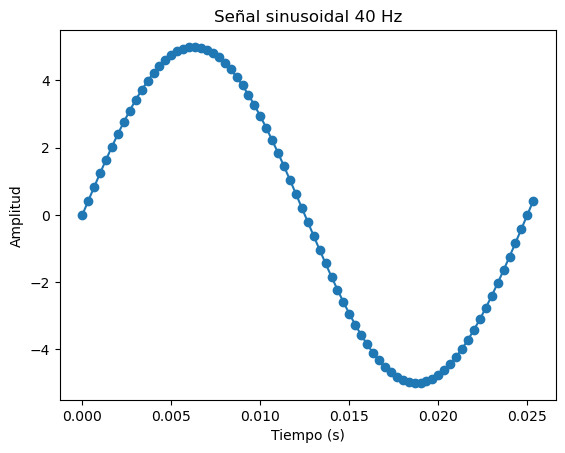

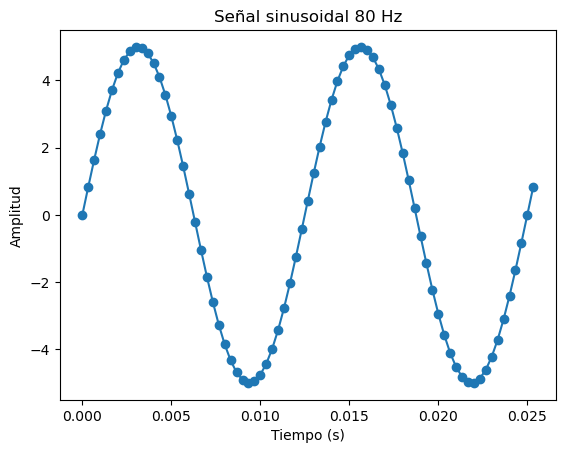

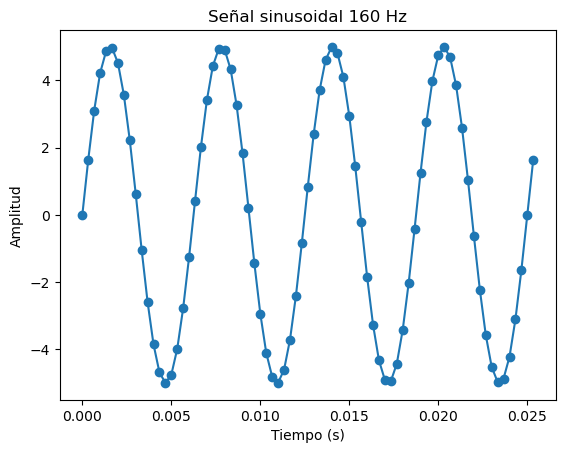

In [29]:
Fo = [40,80,160]
Tp = 1/min(Fo) #Periodo de la señal. Toma el inverso del valor mínimo de la lista con las frecuencias de la señal.
#Se toma el valor mínimo para definir el periodo de la señan el tiempo continuo, porque esta sería la frecuencia fundamental. 80 y 160 serían armónicos.

Fs = 3000 #Frecuencia de muestreo.
T = 1/Fs #Periodo de muestreo. T = 0.0003 seg = 0.3 ms.

def generasenal (Frecuencia, A, tiempo): #Se define una función para generar las señales que se van a sumar.
    return A*np.sin(2*np.pi*Frecuencia*tiempo)


t = np.arange (0,Tp+T,T) #Vector de tiempo para un ciclo de la deñal con duración de Tp mas T (Es decir, 0.026 seg, para que vaya de 0 a 0.025 seg (25 ms) a un paso de 1 ms)
A = 5 #Amplitud de la señal
x = np.zeros(len(t)) #Se inicializa un vector de ceros que se llenará con la suma de las componentes sinusoidales.
for i in Fo: #Se recorre la lista de las frecuencias de las componentes sinusoidales.
    senal = generasenal(i,A,t) #Se suman las componentes sinusoidales, para formar la señal discreta.
    plt.plot(t, senal, marker='o')
    plt.title(f'Señal sinusoidal {i} Hz')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.show()
    x += senal

A continuación se visualiza la señal discreta resultante de la suma de las tres componentes sinusoidales.

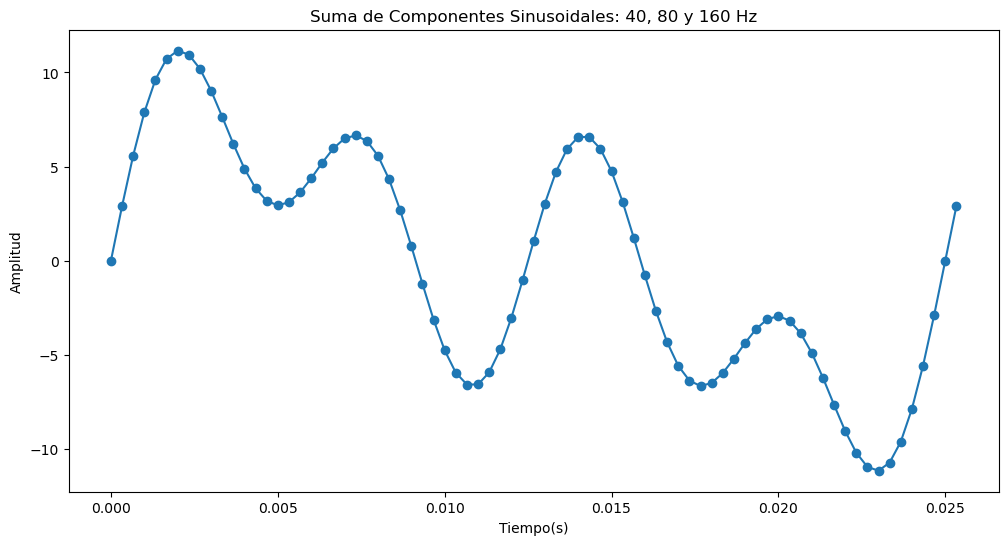

In [32]:
plt.figure(figsize=(12,6))
plt.plot(t,x,marker='o')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.title('Suma de Componentes Sinusoidales: 40, 80 y 160 Hz')
plt.show()

**2.2**	*Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal).*

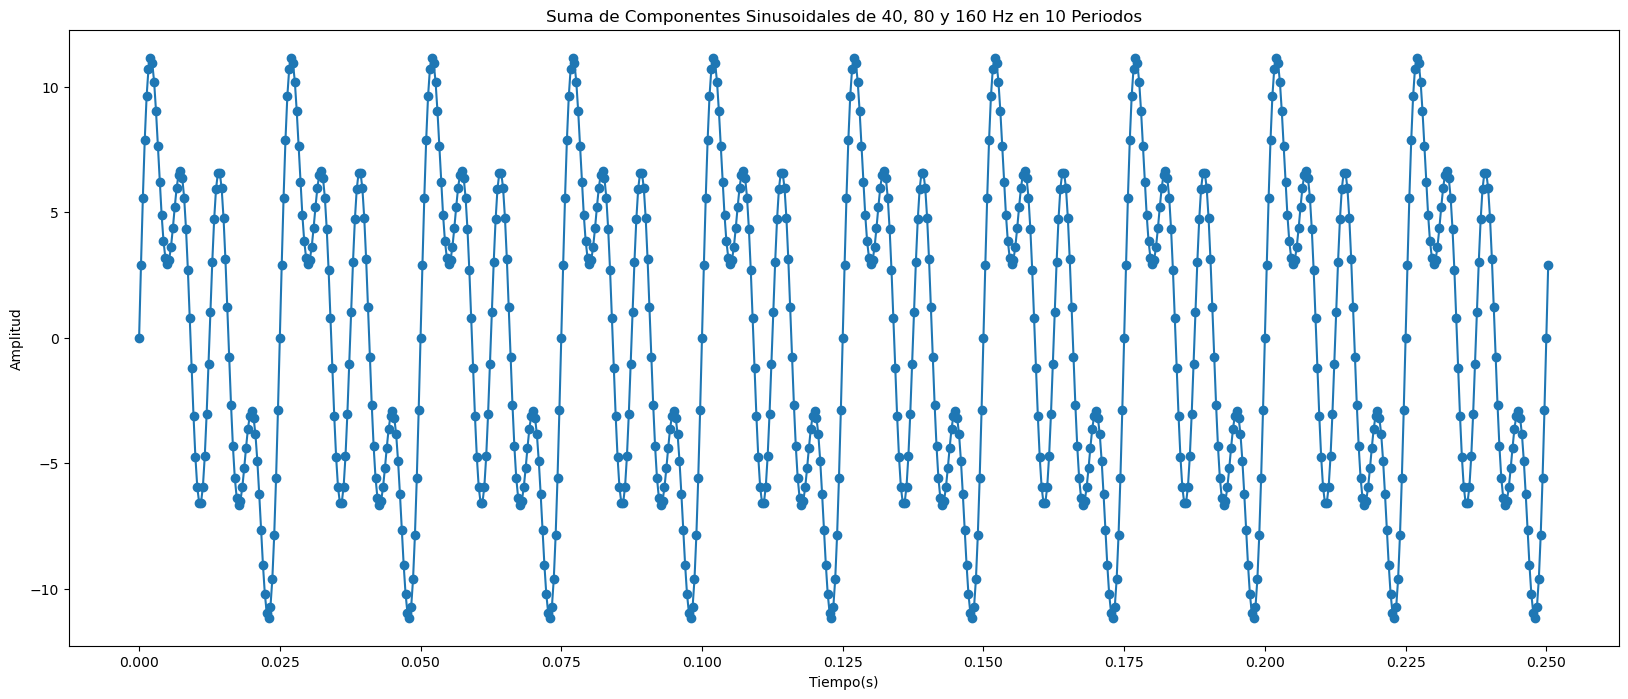

In [35]:
Tp = 10*(1 / min(Fo)) # Se trabaja con 10 periodos de la señal (250 ms).
T = 1/Fs # T = 0.3 ms
t_10 = np.arange (0,Tp+T,T) # El vector de tiempo va de 0 a 250 en un paso de 0.3 ms
A=5
x_10 = np.zeros(len(t_10))

for i in Fo:
    x_10 += generasenal(i,A,t_10)

plt.figure(figsize=(20,8))
plt.plot(t_10,x_10,marker='o')
plt.xlabel('Tiempo(s)')
plt.xticks(np.arange(0, Tp + 0.025, 0.025))
plt.ylabel('Amplitud')
plt.title("Suma de Componentes Sinusoidales de 40, 80 y 160 Hz en 10 Periodos")
plt.show()

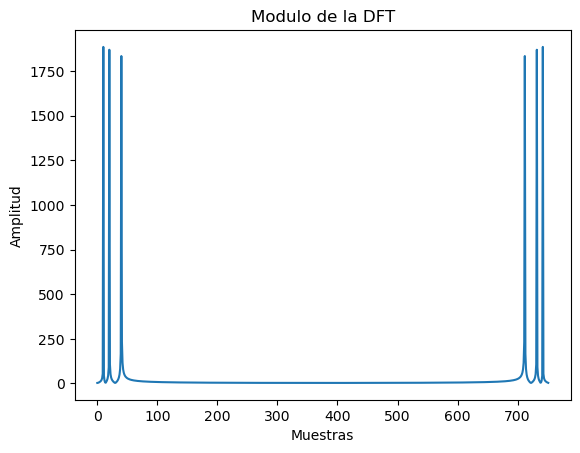

In [37]:
x10=np.fft.fft(x_10) #Se calcula la DFT de la señal.
plt.plot(abs(x10))
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Modulo de la DFT')
plt.show()

Se tienen 752 puntos. El valor máximo que toman los coeficientes es de 1880. La amplitud de la señal discreta es 5, los coeficientes de la señal Xp(n) (obtenida por la repetición de x(n)) serán Ck = 5 * 0,5 = 2,5. De acuerdo a esto X(k) = N*Ck = 752 * 2,5 = 1880 justo en la frecuencia de oscilación.

Ahora, se relaciona directamente la DFT con las frecuencias F de tiempo continuo para extraer información y conclusiones de la señal analógica original.

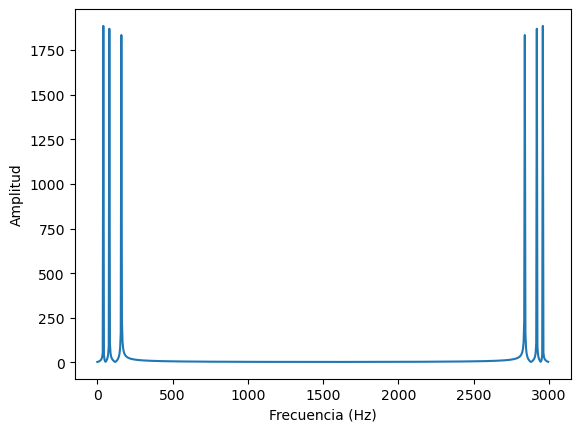

In [40]:
N=len(x10)
F=np.arange(0,N)*Fs/N
plt.plot(F,abs(x10))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

Ya que por simetría se deduce fácilmente la otra mitad, sólo se manipulará y graficará la mitad de los puntos, empleando la frecuencia Nyquist (mitad de la frecuencia de muestreo)

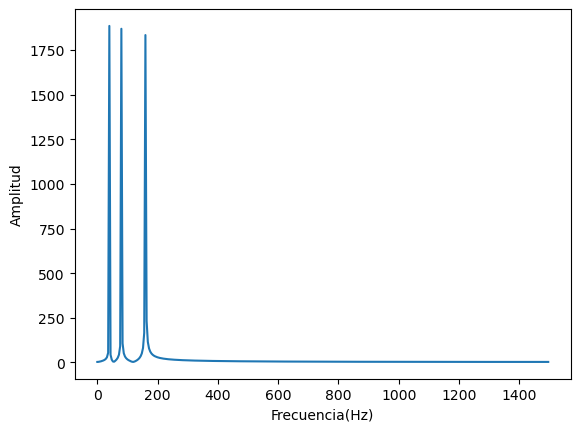

In [43]:
Nmitad=int(np.ceil(N/2))
Fmitad=np.arange(0,Nmitad)*Fs/N
x10mitad=x10[0:Nmitad]
plt.plot(Fmitad,abs(x10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia(Hz)')
plt.show()

Se hace zoom en la señal para visualizar con mayor detalle en qué frecuencias se posicionan los picos.

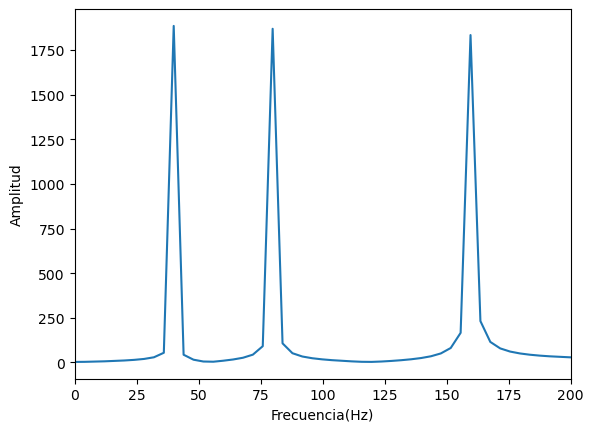

In [46]:
plt.plot(Fmitad,abs(x10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia(Hz)')
plt.xlim(0,200)
plt.show()

Aqui se pueden observar los picos de frecuencia en 40, 80 y 160 Hz.

**2.3** *Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior.*


FFT:Transforma la señal en el dominio del tiempo al dominio de la frecuencia.  Deshace el cambio de desplazamiento aplicado previamente al espectro de la señal.El espectro generado por FFT se organiza de manera que las frecuencias bajas estan en los extremos del arreglo y las más altas en el centro.

np.fft.ifft(): Realiza la Transformada Inversa de Fourier, reconstruyendo la señal en el dominio del tiempo. Ahora mueve las frecuencias bajas al centro y las más altas en el centro.
np.fft.ifftshift(): Invierte el proceso, prepara datos para hacer transformada inversa.



C:\Users\USUARIO\Documents\CAROLINA\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\USUARIO\Documents\CAROLINA\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


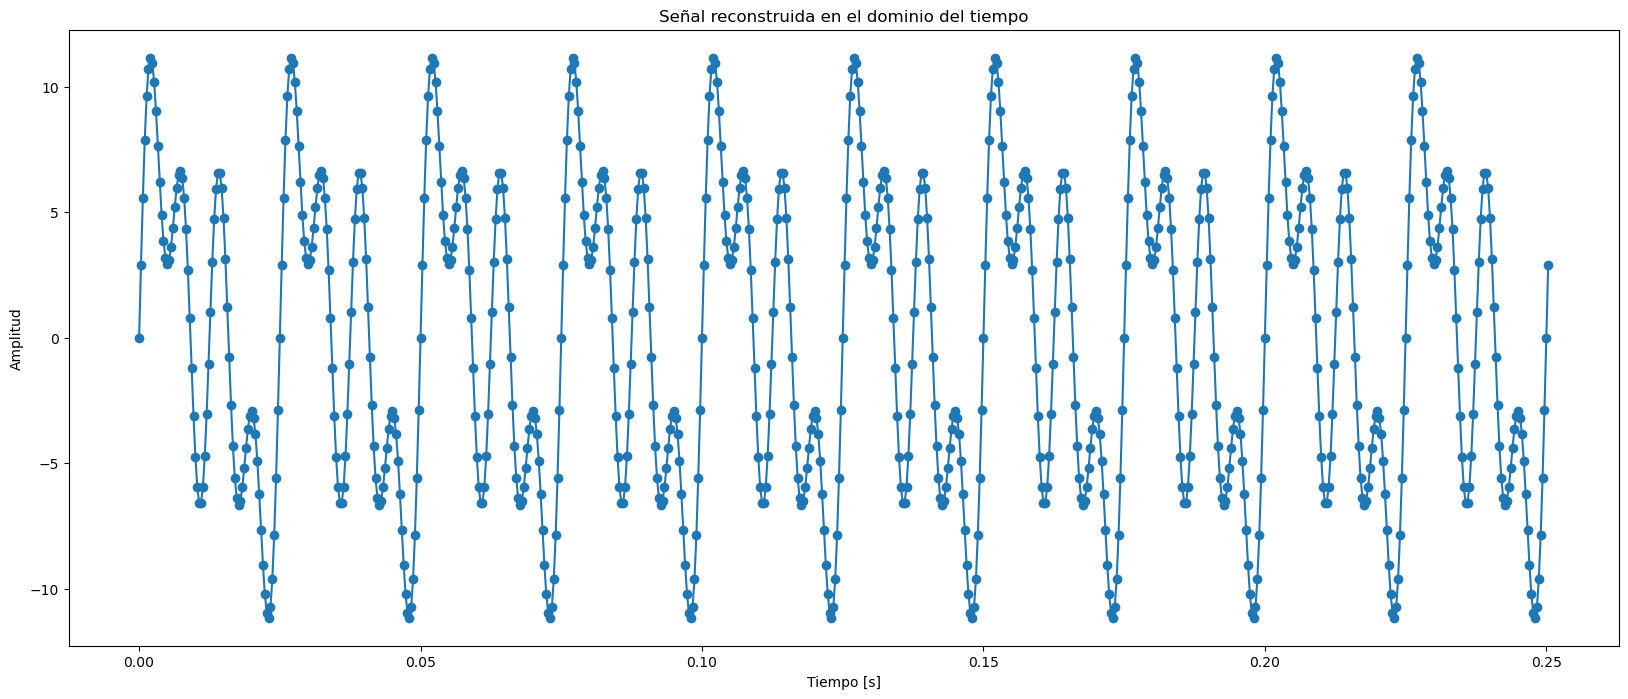

In [51]:
x_reconstruida = np.fft.ifft(x10)
plt.figure(figsize = (20,8))
plt.plot(t_10, x_reconstruida, marker = 'o')
plt.title('Señal reconstruida en el dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

La señal obtenida a partir de la Transformada Inversa presenta un comportamiento oscilatorio, con variaciones notables en la amplitud a lo largo del tiempo. Al analizarla, se puede identificar un período de repetición aproximado entre 100 y 150 segundos, lo que indica la presencia de una componente de baja frecuencia dominante. Además, la señal parece estar compuesta por una combinación de frecuencias bajas y frecuencias altas, lo que sugiere que las componentes de alta frecuencia están moduladas por señales de baja frecuencia. Esto genera un patrón de envolvente que varía en amplitud a lo largo del tiempo.

**2.4**	*¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?*

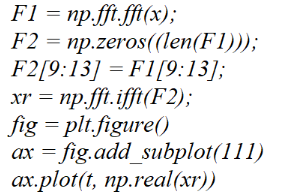

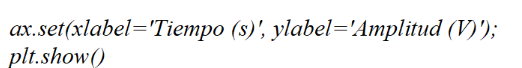

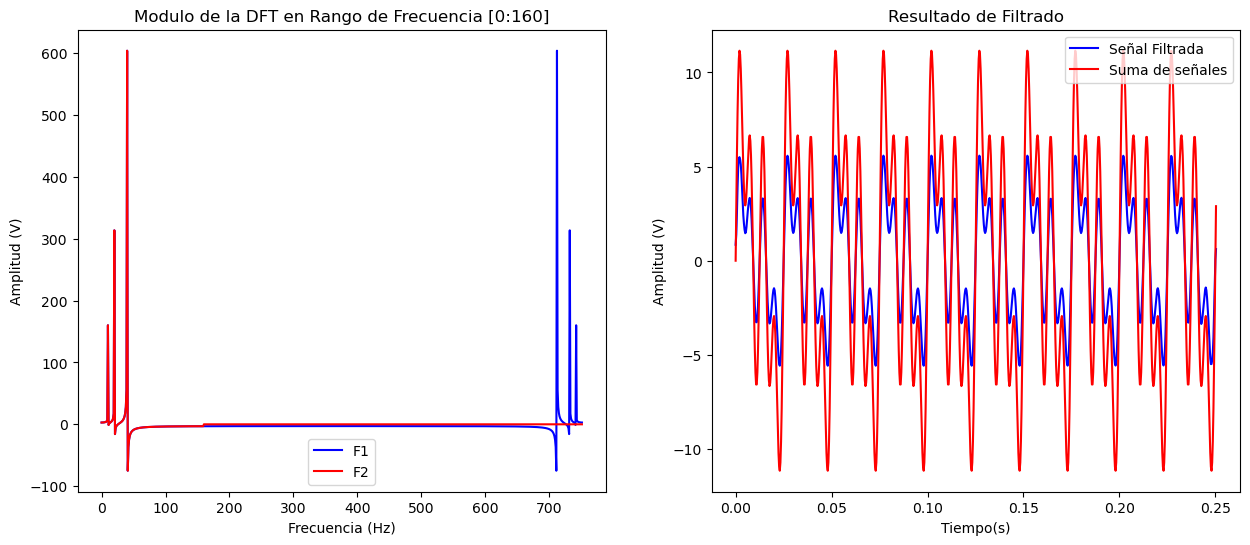

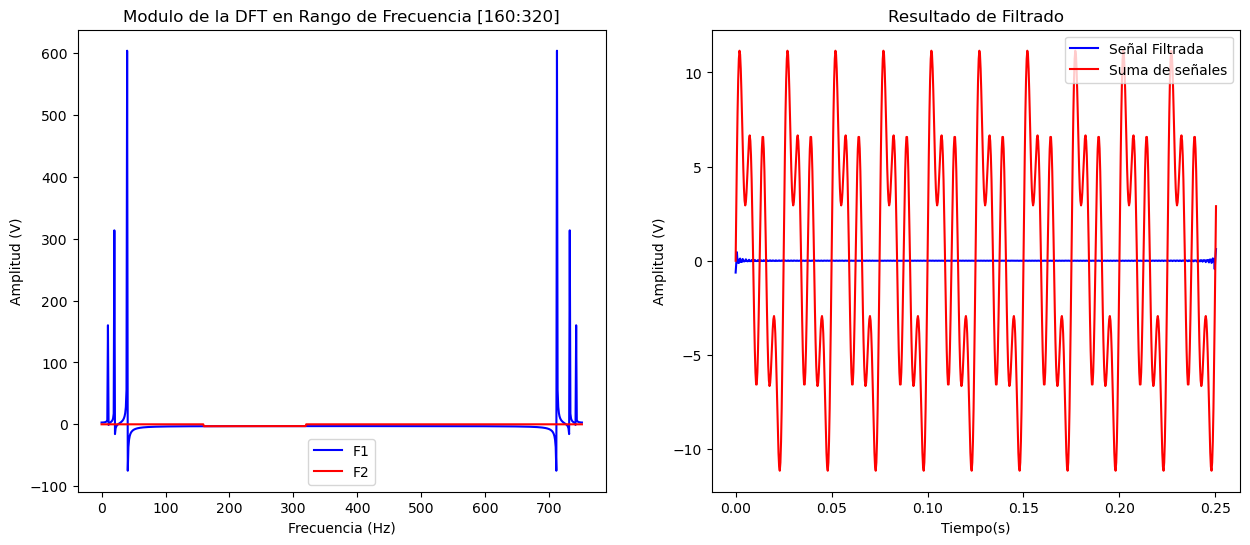

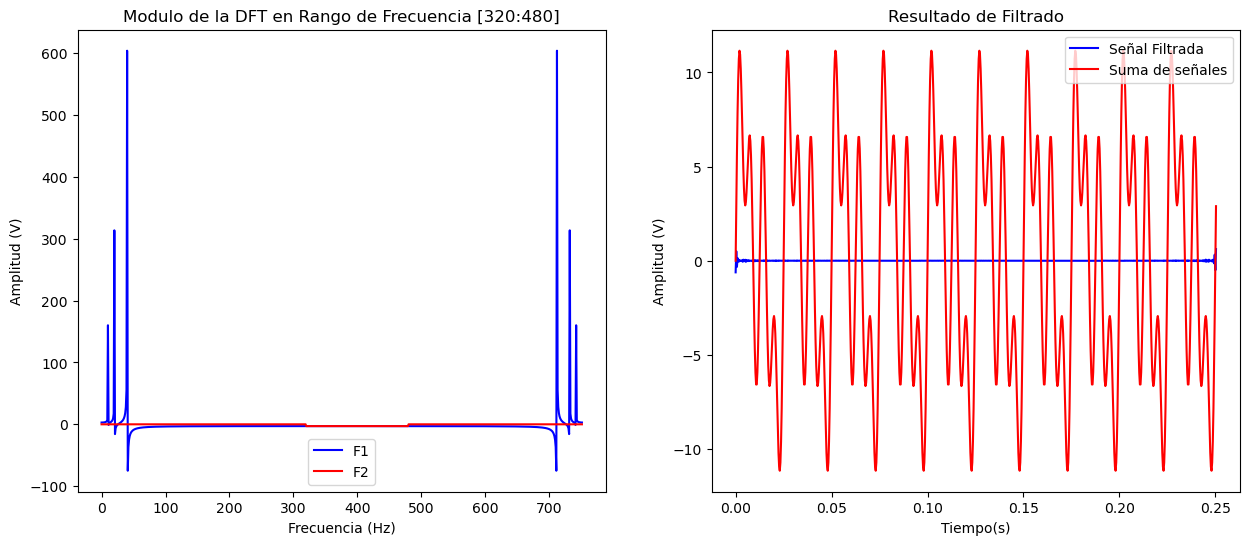

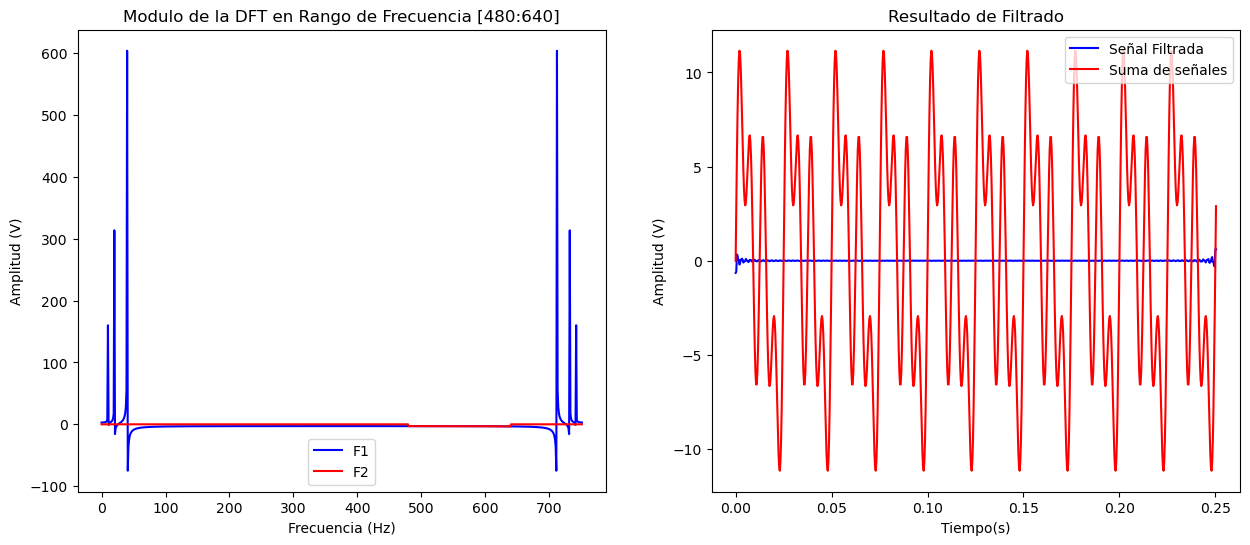

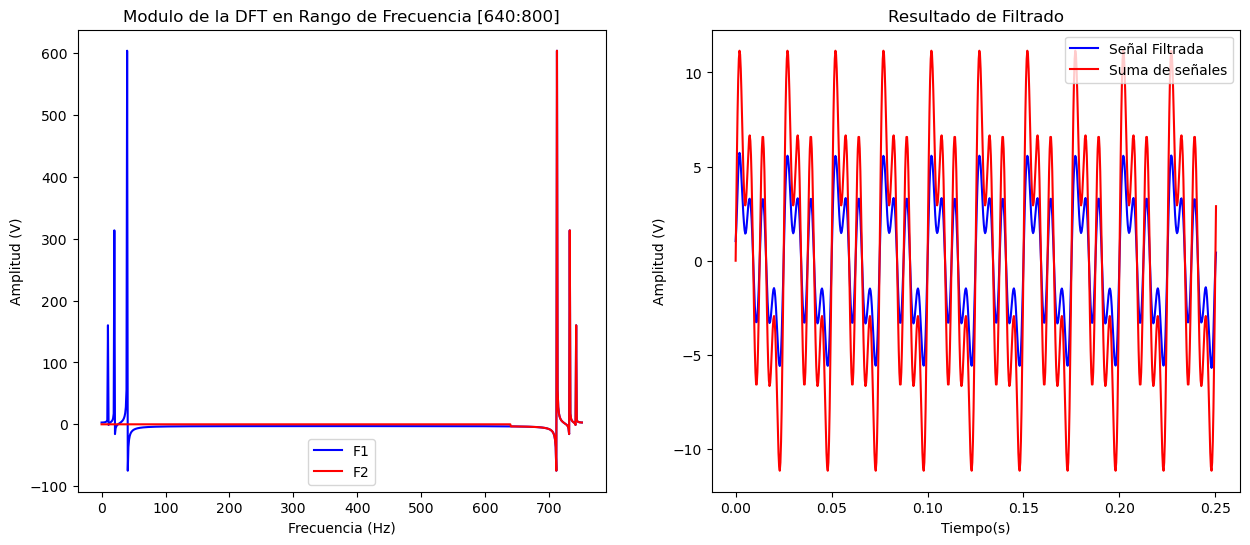

In [56]:
rango_de_frecuencias= range(160, 900, 160)
for i in rango_de_frecuencias:
  an=i-160
  F1=np.fft.fft(x_10)
  F2 = np.zeros_like(F1)
  F2[an:i]=F1[an:i]
  xr=np.fft.ifft(F2)

  plt.figure(figsize=(15,6))

  plt.subplot(1,2,1)

  plt.plot(F1, label="F1", color='b')
  plt.plot(F2, label="F2", color='r')
  plt.xlabel('Frecuencia (Hz)')
  plt.ylabel('Amplitud (V)')
  plt.title(f'Modulo de la DFT en Rango de Frecuencia [{an}:{i}]')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(t_10, np.real(xr), label="Señal Filtrada", color='b')
  plt.plot(t_10, x_10, label="Suma de señales", color='r')
  plt.xlabel('Tiempo(s)')
  plt.ylabel('Amplitud (V)')
  plt.title('Resultado de Filtrado')
  plt.legend()
plt.show()

Para probar el funcionamiento del código, se utilizó como entrada la señal resultante de sumar los componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Al estudiar el código paso a paso, se puede observar que en primer lugar se calcula la transformada de Fourier (F1), obteniendo una representación en el dominio de la frecuencia lo que permite identificar las frecuencias presentes en la señal. Luego, se selecciona un rango de frecuencias de la transformada (F1) y se guarda en (F2), donde se inicializa como un arreglo de ceros de la misma longitud que F1, F2 permite seleccionar el rango de frecuencia deseado de la transformada de Fourier. Posteriormente, se calcula la transformada inversa para ese rango, devolviendo la señal del dominio de la frecuencia al dominio del tiempo. Por lo tanto, se puede afirmar que este proceso actúa como un filtro con la capacidad de filtrar en una frecuencia determinada, lo que se conoce como un filtro pasabanda no ideal.

El filtro se aplicó a la señal completa en intervalos de 160 Hz para analizar su comportamiento. En el rango de 0 a 160 Hz, la señal filtrada presentó similitud a la señal original, ya que los componentes principales de la señal original estaban en ese rango de frecuencias. También se observó un aumento de similitud entre 600 y 800 Hz esto puede deberse a la presencia de armonicos en este rango. Fuera de estos intervalos, las señales tendieron a aproximarse a cero, ya que la señal original no contiene componentes en esas frecuencias. Por otro lado, al aplicar un filtro entre 0 y 160 Hz, se esperaba obtener una señal muy similar a la original; sin embargo, surgieron diferencias.Esto se debió a que, al seleccionar solo las frecuencias positivas y omitir las frecuencias negativas, que son necesarias para una correcta reconstrucción de la señal original debido a la simetría conjugada de la transformada de Fourier para señales reales, se perdió información esencial [1].




**2.5** *El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja).*

**Carga de archivos .mat**

Primero, se carga el archivo "senecg.mat", el cual contiene la señal de ECG con una frecuencia de muestreo de 250 Hz.



In [60]:
archivo_ecg = sio.loadmat('senecg.mat')

---

**Exploración del archivo**

In [62]:
print(archivo_ecg.keys())

dict_keys(['__header__', '__version__', '__globals__', 'ECG'])


---

**Extracción de la señal**

In [66]:
signal_ecg = archivo_ecg['ECG']

In [68]:
#Se estima el numero de muestras de la señal ECG.
muestras=signal_ecg.size
print(f"La señal ECG contiene {int(muestras)} muestras.")

La señal ECG contiene 1250 muestras.


---

**Determinación de la duración de la señal**

In [72]:
#Se estima la duración de la señal teniendo en cuenta una frecuencia de muestreo de 250 Hz.
duracion= signal_ecg.size/250
print(f"La duración de la señal ECG es de {int(duracion)} segundos.")

La duración de la señal ECG es de 5 segundos.


**Número total de muestras =** 1250

**Frecuencia de muestreo =** 250 Hz

**Duración de la señal =** 5 segundos

---

**Creación del vector de tiempo**

In [77]:
time=np.arange(0, duracion,1/250)


In [79]:
signal_ecg = signal_ecg.flatten() # Se modifica la forma de la señal para que quede en una dimensión.

In [81]:
time.shape

(1250,)

In [83]:
signal_ecg.shape

(1250,)

---


**Gráfico de la señal ECG**

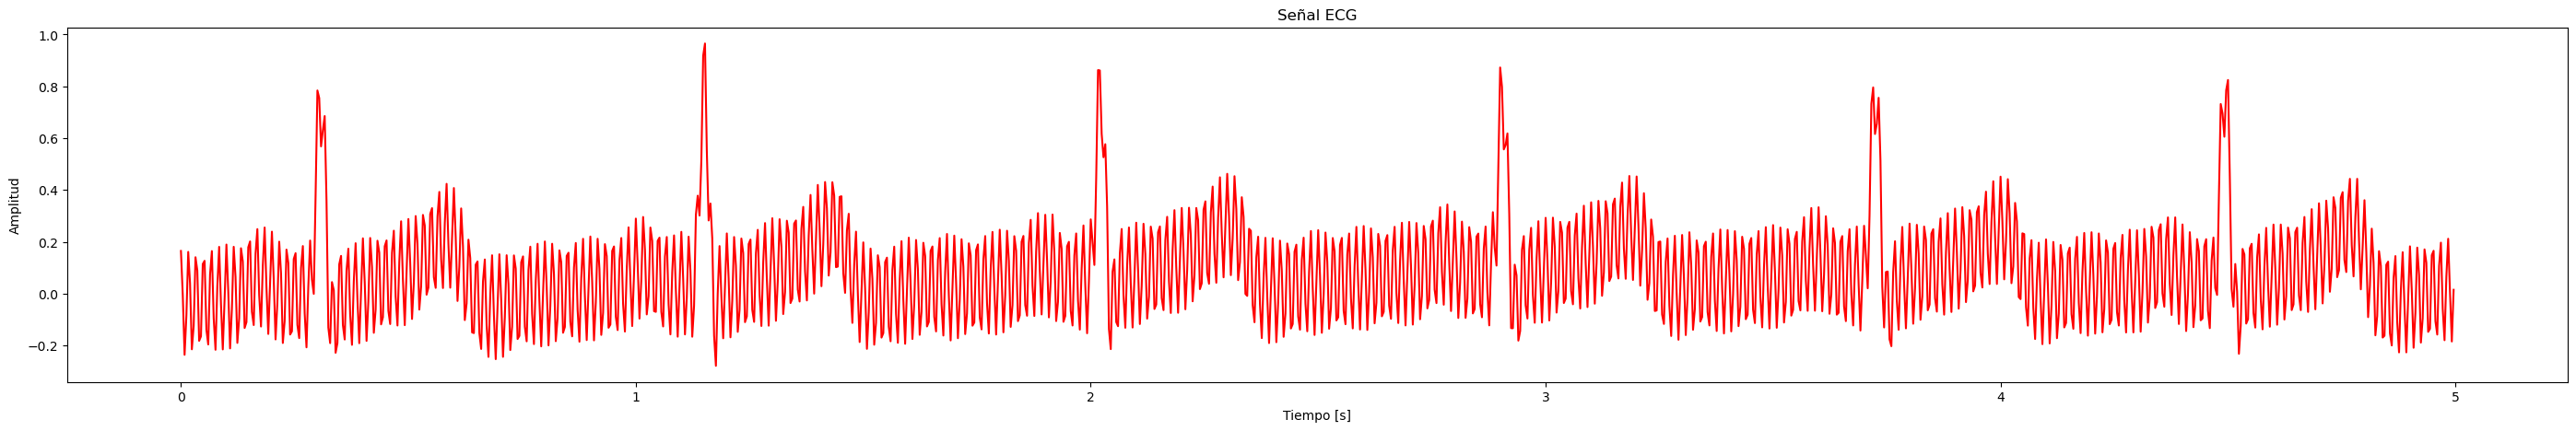

In [87]:
plt.figure(figsize=(35,5))
plt.title('Señal ECG')
plt.plot(time, signal_ecg, color='red')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

**Periodograma de Welch**

In [90]:
energia = sum(signal_ecg**2)
potencia = energia/(len(time)-1)
rms = np.sqrt(potencia)
print(f"La energia de la señal ECG es: {energia:.4f}")
print(f"La potencia media de la señal ECG: {potencia:.4f}")
print(f"El valor cuadratico medio de la señal ECG: {rms:.4f}")

La energia de la señal ECG es: 53.2689
La potencia media de la señal ECG: 0.0426
El valor cuadratico medio de la señal ECG: 0.2065


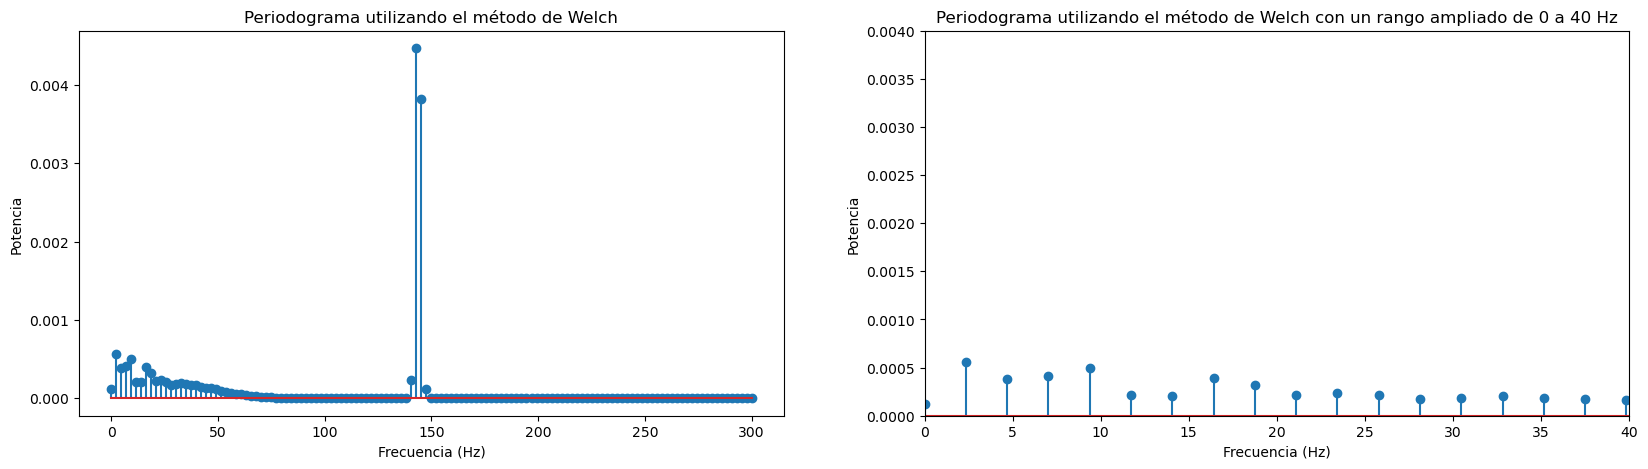

In [94]:
fs = 600 # Frecuencia de muestreo de la señal ECG
# Calcular la longitud de la señal
len_signalecg = len(signal_ecg)
# Ajustar nperseg según la longitud de la señal
nperseg = min(256, len_signalecg)  # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, pxx = welch(signal_ecg, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.stem(f, pxx)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma utilizando el método de Welch")
#plt.ylim([0, 0.002])
plt.subplot(1,2,2)
plt.stem(f, pxx)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma utilizando el método de Welch con un rango ampliado de 0 a 40 Hz")
plt.xlim([0,40])
plt.ylim([0,0.004])
plt.show()

Como se puede observar en el periodograma utilizando el método de Welch, hay señales predominantes en frecuencias menores a 40 Hz. Esto tiene sentido, ya que dentro de este rango se encuentran las frecuencias de las ondas representativas de una señal de ECG. El complejo QRS, que corresponde a la despolarización de los ventrículos, generalmente contiene frecuencias entre 8 y 50 Hz, siendo la más predominante. La onda T se sitúa principalmente en un rango de 0 a 10 Hz, asociada a la repolarización de los ventrículos. Por otro lado, la onda P se caracteriza por frecuencias de 5 a 30 Hz, relacionadas con la despolarización de las aurículas [2]. Sin embargo, se observa un pico notable a 60 Hz, que se debe a la interferencia de la red eléctrica, así como a ruido de baja frecuencia, inferior a 0.5 Hz, causado por la respiración del paciente, la interferencia de otras señales fisiológicas, entre otros factores . Para abordar este problema, se emplean filtros pasa bajas con una frecuencia de corte de 50 Hz, que eliminan la interferencia de la red eléctrica, y filtros pasa altas de 0.5 Hz, que ayudan a reducir la interferencia de señales no deseadas y a eliminar el ruido, todo mientras se preservan las características de la señal [3].


Para eliminar estas señales no deseadas, se utiliza el filtro planteado en el punto 2.5, que actúa como un filtro pasa banda. Por lo tanto, se establece un rango de frecuencia de 0.5 a 50 Hz, donde se encuentran las señales que representan el ECG, mientras que se elimina el ruido de baja y alta frecuencia.

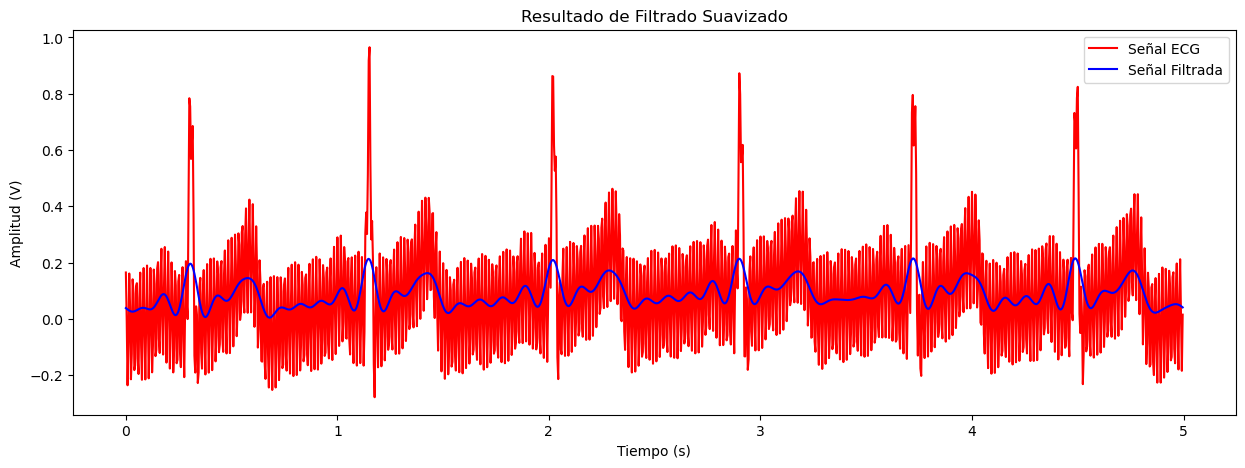

In [97]:
F1 = np.fft.fft(signal_ecg)

# Crear una ventana suave para suavizar el corte

hann_window = np.hanning(80)  # Ajusta el tamaño de la ventana
F2 = np.zeros_like(F1) # Crea un array de ceros que tiene exactamente las mismas dimensiones y tipo de datos que F1.
F2[0:40] = F1[0:40]
F2[40:50] = F1[40:50] * hann_window[40:50]
# Transformada inversa para obtener la señal filtrada
xr = np.fft.ifft(F2)
# Gráfica de la señal original y la señal filtrada
plt.figure(figsize=(15,5))
plt.plot(time, signal_ecg, label="Señal ECG", color='r')
plt.plot(time, np.real(xr), label="Señal Filtrada", color='b')

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.title('Resultado de Filtrado Suavizado')
plt.legend()
plt.show()

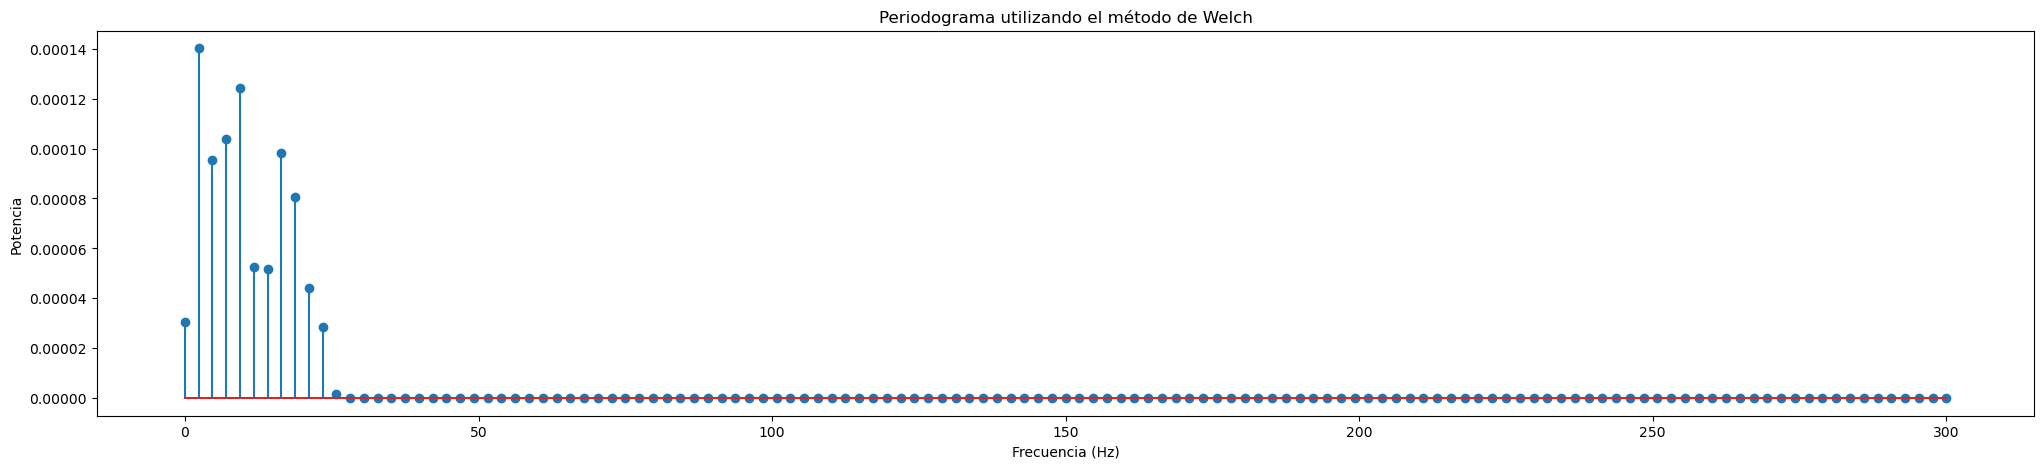

In [99]:
fs = 600 # Frecuencia de muestreo de la señal ECG
# Calcular la longitud de la señal
len_signalecg = len(np.real(xr))
# Ajustar nperseg según la longitud de la señal
nperseg = min(256, len_signalecg)  # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, pxx = welch(np.real(xr), fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(25,5))
plt.stem(f, pxx)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma utilizando el método de Welch")




plt.show()


Al comparar la señal de ECG filtrada con la señal sin filtrar, se puede observar una reducción significativa del ruido en la señal filtrada. Esto se confirma al realizar nuevamente el periodograma, donde el pico prominente de 60 Hz ha sido eliminado. Sin embargo, el filtrado también ha provocado una pérdida considerable de la dinámica de la señal original. Esto sugiere que, al conservar únicamente las frecuencias más bajas, no solo se eliminó el ruido, sino también componentes de frecuencia esenciales que forman parte de la estructura del ECG, como el complejo QRS, la onda P y la onda T.

**2.6** *Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventana)*

**Carga de la carpeta donde se encuentran los datos**

In [104]:
archivo_zip = 'datos_senales_datos_parkinson_cursos.zip'
ruta_destino = './' #La ruta de destino será la misma carpeta
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref: #Se descomprime el archivo
    zip_ref.extractall(ruta_destino)

In [105]:
directorio_actual=os.getcwd()

In [106]:
archivos_control = os.listdir(directorio_actual + "/control") #Se extraen los archivos de la carpeta control.
archivos_parkinson = os.listdir(directorio_actual + "/parkinson") #Se extraen los archivos de la carpeta Parkinson.

Se seleccionan dos sujetos, un sujeto control y un sujeto con parkinson de manera aleatoria. En el análisis realizado anteriormente, en ningún canal se identificaron diferencias, por lo que se eligió al azar el canal 4 para realizar el análisis en frecuencia y el posterior análisis comparativo según lo indicado por los periodogramas.

**Carga de las rutas  del sujeto control**

In [112]:
sujeto_control = archivos_control[5]
sujeto_parkinson = archivos_parkinson[0]

In [114]:
path_control = (directorio_actual + "/control" + "/" + sujeto_control) #Ahora se carga la ruta de un sujeto control
data_control= sio.loadmat(path_control)
data_c = data_control['data'] #Extraemos la clave donde se encuentran contenidas las señales

In [116]:
#Se convierte en una señal continua
senal_c_continua=np.reshape(data_c,(data_c.shape[0],data_c.shape[1]*data_c.shape[2]),order="F")

In [118]:
senal_c_c4 = senal_c_continua[3, :] #Canal 4, todas las muestras

**Carga de las rutas del sujeto con parkinson**

In [121]:
path_parkinson = (directorio_actual + "/parkinson" + "/" + sujeto_parkinson) #Ahora se carga la ruta de un paciente
data_parkinson= sio.loadmat(path_parkinson)
data_p = data_parkinson['data'] #Extraemos la clave donde se encuentran contenidas las señales

In [123]:
senal_p_continua=np.reshape(data_p,(data_p.shape[0],data_p.shape[1]*data_p.shape[2]),order="F")

In [125]:
senal_p_c4 = senal_p_continua[3, :] #señal del Canal 4, todas las muestras

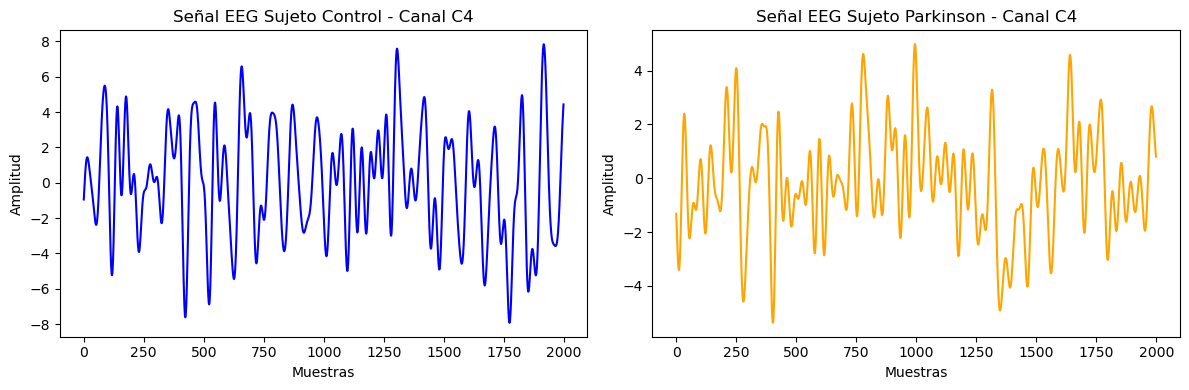

In [157]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 2 columnas

# Gráfico del primer sujeto (control)
axs[0].plot(senal_c_c4[:2000], color = 'blue')
axs[0].set_title('Señal EEG Sujeto Control - Canal C4')
axs[0].set_xlabel('Muestras')
axs[0].set_ylabel('Amplitud')

# Gráfico del segundo sujeto (Parkinson)
axs[1].plot(senal_p_c4[:2000], color = 'orange')
axs[1].set_title('Señal EEG Sujeto Parkinson - Canal C4')
axs[1].set_xlabel('Muestras')
axs[1].set_ylabel('Amplitud')

# Mostrar las gráficas
plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()

Según lo reportado en la literatura, la señal de EEG tiene un rango de frecuencias de 0.1-100 Hz. De acuerdo a esto, la frecuencia máxima (Fmax) estaría establecida en 100 Hz. Dado que en los archivos no se especificaba la frecuencia de muestreo, considerando el teorema de Nyquist, la frecuencia mínima de muestreo para representar la señal de manera discreta sería 200 Hz (el doble de la Fmax). No obstante, se estima una Fs = 1000 Hz para garantizar precisión en la precisión de las señales EEG, al ser una señal con frecuencias tan variables.

**Periodograma de Welch**

Text(0.5, 1.0, 'Periodograma de Welch - sujeto con Parkinson')

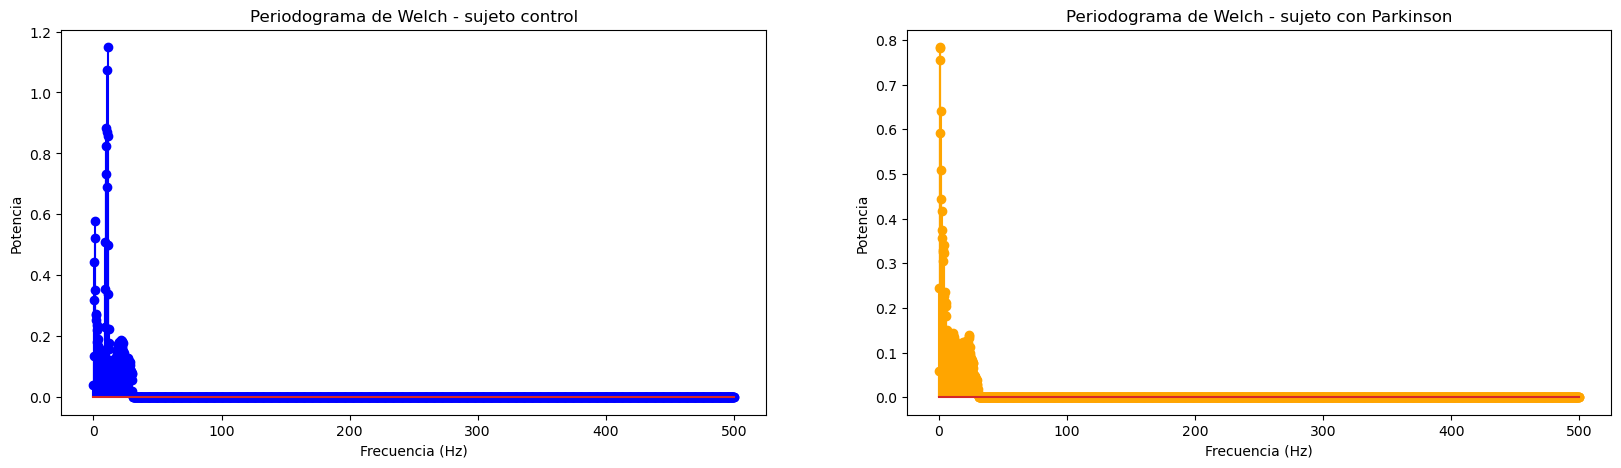

In [150]:
fs = 1000 # Frecuencia de muestreo de la señal EEG
nperseg = 4000 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas del 50%
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f_control, pxx_control = welch(senal_c_c4, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)
f_parkinson, pxx_parkinson = welch(senal_p_c4, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.stem(f_control, pxx_control, linefmt='blue')
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma de Welch - sujeto control")

plt.subplot(1,2,2)
plt.stem(f_parkinson, pxx_parkinson, linefmt='orange')
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma de Welch - sujeto con Parkinson")

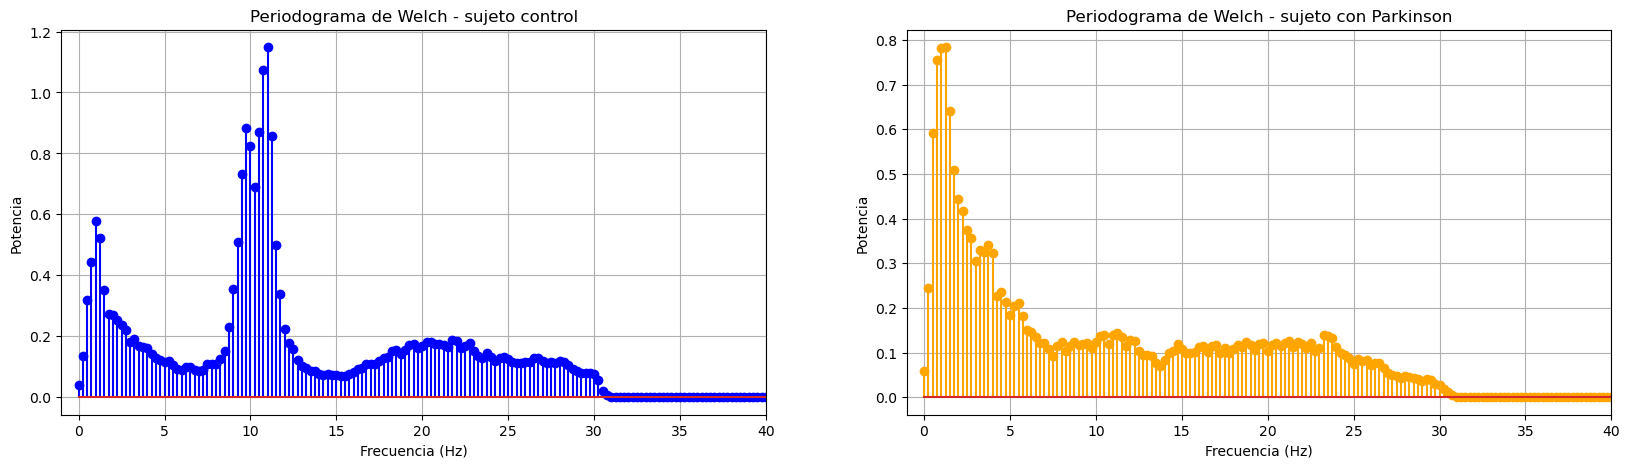

In [133]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.stem(f_control, pxx_control, linefmt='blue')
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma de Welch - sujeto control")
plt.xlim([-1, 40])
plt.grid()

plt.subplot(1,2,2)
plt.stem(f_parkinson, pxx_parkinson, linefmt='orange')
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma de Welch - sujeto con Parkinson")
plt.xlim([-1,40])
plt.grid()
plt.show()

Al momento de seleccionar el ancho de la ventana para el periodograma, es de suma importancia considerar el mantener equilibrio entre la resolución temporal y la resolución en frecuencia. No obstante, para este caso, se priorizará la resolución en frecuencia, puesto que se desea identificar cambios en las bandas de frecuencia entre sujetos control y sujetos con parkinson. Para una señal de EEG con una Fs = 1000, la resolución en frecuencia es de 0.25 Hz, lo que es ideal para análisis de bandas de frecuencia bajas, sin omitir las bandas de frecuencia más altas de la señal EEG, como Beta y Gamma. Se hicieron intentos previos con ventanas de menor tamaño y se omitían algunas bandas de frecuencia. Adicionalmente, otro factor relevante al establecer el ancho de la ventana es la selección del mismo en función la longitud de la señal. Las señales analizadas tienen longitudes mayores a 280.000 muestras, por lo que una ventana con un ancho mayor es conveniente para captar de manera adecuada las variaciones en frecuencia de la señal, facilitando a su vez el cálculo computacional.

Así mismo, un solapamiento del 50% es una opción estándar y se considera apropiado para señales de EEG, por la variedad de frecuencias que se pueden encontrar en la misma y los constantes cambios temporales. [4] [5]

Al visualizar el periodograma obtenido utilizando el método de Welch, se observan picos en distintas frecuencias, lo que es un resultado esperado al trabajar con señales de electroencefalografía, por sus distintas bandas de frecuencia. En este caso se identifican las 4 bandas de frecuencia, siendo la frecuencia más elevada de aproximadamente 30 Hz, correspondiente a ondas Gamma. No se detectaron ondas de muy alta frecuencia. También se observa que la señal EEG ya había atravesado un proceso de filtrado previamente, pues no se encuentran presentes las ondas de la red eléctrica en 60 Hz. 

**Análisis comparativo en el dominio de la frecuencia**

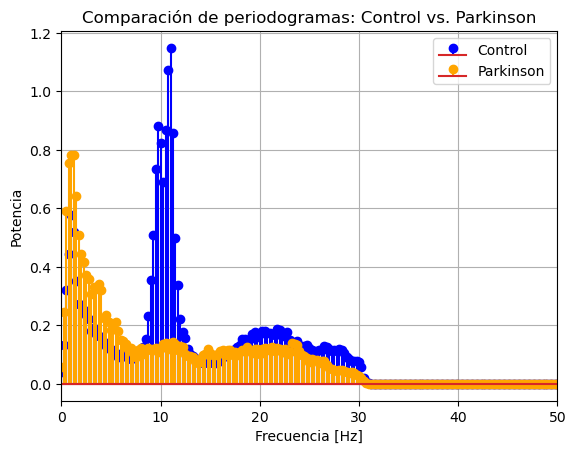

In [137]:
plt.stem(f_control, pxx_control, linefmt='blue', label='Control')
plt.stem(f_parkinson, pxx_parkinson, linefmt='orange', label='Parkinson')

plt.xlim([0, 50])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.title('Comparación de periodogramas: Control vs. Parkinson')
plt.grid()
plt.legend()
plt.show()

In [139]:
# Definición de las bandas de frecuencia
bandas = {'Delta': (0.2, 3.5), 'Theta': (4, 7.5), 'Alfa': (8, 12.5), 'Beta': (13, 29), 'Gamma': (30, 90)
}

def calcular_potencia_banda(frecuencia, pxx, bandas):
    potencia_bandas = {}
    for banda, (f_min, f_max) in bandas.items():
        indices = np.where((frecuencia >= f_min) & (frecuencia <= f_max))
        potencia_bandas[banda] = np.trapz(pxx[indices], frecuencia[indices])
    return potencia_bandas

potencia_control = calcular_potencia_banda(f_control, pxx_control, bandas)
potencia_parkinson = calcular_potencia_banda(f_parkinson, pxx_parkinson, bandas)

print("Potencia por banda para sujeto control:", potencia_control)
print("Potencia por banda para sujeto con Parkinson:", potencia_parkinson)


Potencia por banda para sujeto control: {'Delta': 0.9978658641633265, 'Theta': 0.378361546497403, 'Alfa': 2.4553806967789744, 'Beta': 2.01284033148499, 'Gamma': 0.036954908199607804}
Potencia por banda para sujeto con Parkinson: {'Delta': 1.6442883717389167, 'Theta': 0.611645998947088, 'Alfa': 0.5573956429790268, 'Beta': 1.552136800390422, 'Gamma': 0.01595473404997414}


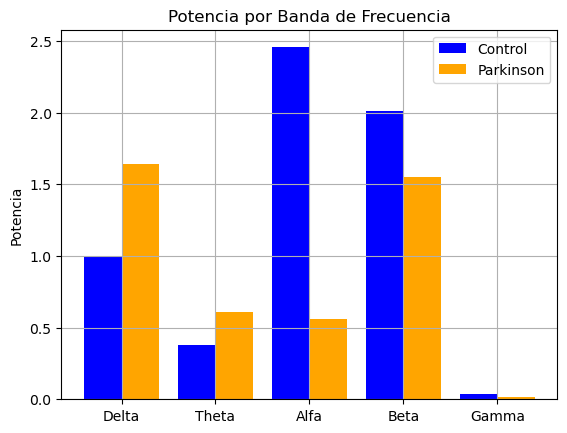

In [152]:
import matplotlib.pyplot as plt

bandas_nombres = list(bandas.keys())
potencias_control = [potencia_control[banda] for banda in bandas_nombres]
potencias_parkinson = [potencia_parkinson[banda] for banda in bandas_nombres]

x = np.arange(len(bandas_nombres))
plt.bar(x - 0.2, potencias_control, width=0.4, label='Control', color='blue')
plt.bar(x + 0.2, potencias_parkinson, width=0.4, label='Parkinson', color='orange')

plt.xticks(x, bandas_nombres)
plt.ylabel('Potencia')
plt.title('Potencia por Banda de Frecuencia')
plt.legend()
plt.grid()
plt.show()


La  actividad  EEG  ha  sido  clasificada en rangos de frecuencias. Las bandas más comunes son: delta (0.2-3.5 Hz), theta (4-7.5Hz), alfa (8-12.5 Hz), beta (13-29Hz) y gamma (30-90 Hz). Cada banda de frecuencia muestra características de amplitud, frecuencia, morfología y distribución. Estas bandas participan de manera diferencial en distintas funciones cerebrales. Existe una relación inversa entre la frecuencia y la amplitud de las bandas, es  decir, las bandas más lentas tienen una mayor amplitud y las rápidas una menor amplitud [6]. A grandes rasgos, podemos observar que en el sujeto con Parkinson presenta una mayor potencia en frecuencias dentro del rango de 0-10 Hz, correspondientes a las ondas delta y tetha. Por otro lado, el sujeto control presenta mayor potencia en frecuencias proximas a los 10 Hz, que pueden corresponder a las ondas alfa, sucede lo mismo para las bandas de frecuencias dentro del rango de 20-30 Hz, aproximadamente.

En estudios posteriores se han reportado disminuciones en las bandas de frecuencia altas (Beta y Gamma), mientras que las bandas de frecuencia bajas presentan un aumento [7]. En la enfermedad de Parkinson, las neuronas pigmentadas de la sustancia nigra, el locus ceruleus y otros grupos dopaminérgicos del tronco encefálico se ven degenerados por la agregación de cuerpos de Lewy. La pérdida de las neuronas de la sustancia nigra produce el agotamiento de la dopamina en la cara dorsal del putamen y causa muchas de las manifestaciones motoras de la enfermedad de Parkinson [8]. La reducción de las ondas de alta frecuencia está relacionada con dicha pérdida dopaminérgica, puesto que se generan actividades oscilatorias anormales en diferentes regiones del cerebro. Las ondas betas, por su parte, se han asociado con procesos de control motor, por lo que se ha fundamentado la ralentización de estas ondas con los síntomas de rigidez muscular y bradicinesia que presentan las personas con Enfermedad de Parkinson (EP). Adicionalmente, el aumento de las ondas Delta, relacionada con procesos inhibitorios y Theta, asociada con mecanismos de plasticidad cerebral, memoria y atención, se ha vinculado con déficits en el procesamiento cognitivo. La explicación fisiopatológica de los cambios en potencia de las bandas de frecuencia desde la fisiopatología de la enfermedad es fundamental para tener una comprensión más amplia sobre cómo se ven afectadas diferentes funciones, y cómo esto se ve reflejado en la actividad eléctrica de las neuronas, lo que es útil en el campo del desarrollo de biomarcadores para diagnóstico de enfermedades neurodegenerativas a través de técnicas como la EEG.

Al hacer el análisis en frecuencia y observar la intensidad promedio de las señales para las distintas bandas, se puede observar la variación entre sujetos control y sujetos con Parkinson. Sería recomendable hacer un análisis comparativo en frecuencia con una mayor cantidad de sujetos, de manera que se puedan aplicar pruebas estadísticas que resulten representativas para identificar si dichas diferencias en la potencia son significativas entre los grupos, ya que debe entrar a consideración que entre pacientes puede no presentarse la misma variabilidad en bandas de frecuencia, ya que esta se encuentra asociada con el estadío de la enfermedad. En la presente práctica el análisis se limitó a ser exploratorio para comprender su aplicación.

# **3. Conclusiones**



*   Con los graficos mostrados en el periodograma de Welch y los calculos realizados de energía, RMS y potencia a la señal  del archivo tomado, se puede confirmar que las frecuencias clave de una señal ECG se encuentran en un rango alrededor de 0.5Hz y 50Hz
*   Cuando se analiza la señal filtrada, se puede determinar es ques efectivo y en este caso es ideal para eliminar ruido de la red electrica que es a 60Hz, esto teniendo presente la señal de ECG para no dañarla .
* Es importante tener en cuenta la frecuencia de corte para minimizar la distorción de la señal original para poder conservar la señal de interes en buenas condiciones
* Al realizar el análisis en frecuencia de las señales EEG para los sujetos aleatorios específicamente en el canal 4, se observó la importancia del análisis de las señales en este dominio para la comprensión de la dinámica cerebral partiendo de la variabilidad que se puede presentar entre sujetos control y sujetos con Parkinson en las bandas de frecuencia caracterizadas para el electroencefalograma, lo que permite profundizar en cómo los fenómenos patológicos que contribuyen al desarrollo de los síntomas y cómo estas alteraciones fisiológicas se ven reflejadas en la actividad eléctrica cerebral y en la disminución o aumento de las diferentes bandas de frecuencia. No obstante, los análisis realizados durante la práctica son limitados ya que fueron realizados exclusivamente en dos sujetos, y sería de gran interés realizar nuevamente el análisis para un mayor número de sujetos, de manera que la comparación y conclusiones tengan mayor validez.



# **4. Referencias**

[1] “Introducción a la Teoría del Procesamiento Digital de Señales de Audio”. https://www.artes.udelar.edu.uy/. Accedido el 12 de octubre de 2024. [En línea]. Disponible: https://www.eumus.edu.uy/eme/ensenanza/electivas/dsp/presentaciones/clase08.pdf

[2] L. Tereshchenko y M. E. Josephson, “Frequency Content and Characteristics of Ventricular Conduction”, J Electrocardiol, vol. 48, n.º 6, 2015. [En línea]. Disponible: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4624499/#:~:text=Modern%20ECG%20machines%20record%20ECG,Hz%20as%20an%20industry%20standard.

[3] J. Lorenzo, “Análisis de señales electrocardiografías usando técnicas de procesamiento digital”, Trabajo de grado, Univ. Oberta Catalunya, 2015. [En línea]. Disponible: https://openaccess.uoc.edu/bitstream/10609/40186/6/jlorenzoroTFC0115memoria.pdf

[4] “Running Welch’s method for the estimation of power spectra in Syncopy — Syncopy 2023.9 documentation”. Syncopy Documentation — Syncopy 2023.9 documentation. [En línea]. Disponible: https://syncopy.readthedocs.io/en/stable/tutorials/welch.html

[5] “Welch's Method”. Center for Computer Research in Music and Acoustics | CCRMA. [En línea]. Disponible: https://ccrma.stanford.edu/~jos/sasp/Welch_s_Method.html

[6] M. R. Torres-Castro, J. D. Castañeda-Rodriguez, Y. A. Cerna-Campos, y R. O. Morales-Actividad eléctrica cerebral: métodos de registro y análisis y sus implicaciones en la organización funcional del cerebro," ResearchGate, 2023. [En línea]. Disponible: https://www.researchgate.net/publication/367118309_Actividad_electrica_cerebral_metodos_de_registro_y_analisis_y_sus_implicaciones_en_la_organizacion_funcional_del_cerebro

[7] L. Nucci, F. Miraglia, P. M. Rossini y F. Vecchio. “Exploring the complexity of EEG patterns in Parkinson’s disease - GeroScience”. SpringerLink, 2024. [En línea]. Disponible: https://link.springer.com/article/10.1007/s11357-024-01277-y

[8] K.-H. Chang, et al. “Evaluating the Different Stages of Parkinson’s Disease Using Electroencephalography With Holo-Hilbert Spectral Analysis”. Frontiers, 2024. [En línea]. Disponible: https://www.frontiersin.org/journals/aging-neuroscience/articles/10.3389/fnagi.2022.832637/full